[187 738 993 515 421  36 506   3 973 530 402 311 845   7 882 664 921 199
 278 243 936 234  38  23 474  67 687 229 747 381 658 961 732 703 700 339
 437 490 754  99 305 124 792 830 193 662 187 978 305 490 594  79 205 600
 732 322 585 246  44 731  92 559 141 983 517 190 665 604 485 660   3 914
 175 632 868 781 493 102 972 213 270 309 405 313 900  55  23 668 554 677
 933 695 401  64 512  50 339 104  10 961 125 854 375 208 463 556 779 827
  40 689 725 171 794 952 374 937 540 715 887 894  14 290 698 675 910 264
 750 954 789  51 290 124  40  78 442 966 748 973 552 707  45 746 152 303
 244 211 456 772 976 229 132  20 213 274 743 500  58 372  24 828 401 331
 169 284 546 936 208 560 245  44 681 456 612 438 813 473 768 658 265 663
 959 453 754 834 796 943 767 380 177 683 758 183 249 500 984 604 427 898
 109 112 543 535 576 365 749 936  56 175 613 331 138  76 246 598 824 554
 303  55 315  77 595 406 445  98 486  49 431 101 179 161 555  58 728 422
 556 777 584 289 833 978 752 472 339 507 520 493 36

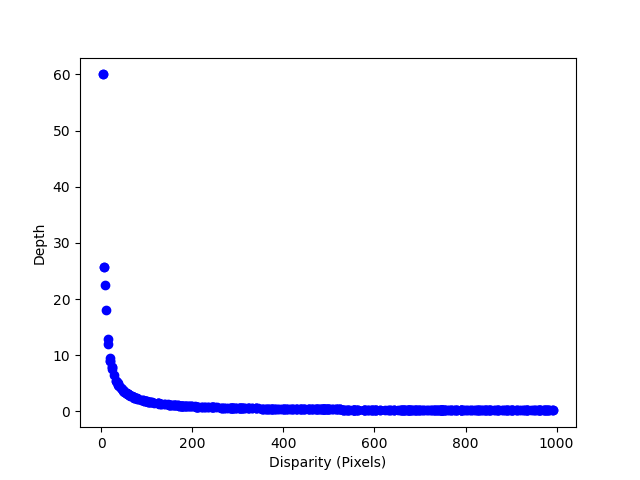

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Summary:
# My naive approach to understand why deriving at absolute depth from disparity loses accuracy after a particular and somewhat near distance ~ 1 meter. 

# Background: 
# We are able to acquire disparity map from iPhone's portrait photos.  From that we try to derive at an absolute depth information using the most intuitive conversion
# i.e. depth = 1 / disparity
# However this conversion made it very apparent that after 1.5m of distance, the derived values of absolute depth would become coarse.

# Theory:
# I wanted to entertain the idea of actually calculating the absolute depth more precisely using focal length, baseline and disparity values.  
# i.e. Z = focal_length * baseline / disparity
# I expected the results to be more consistent with uniform density even after 1 meter.

# However in order to calculate focal length in pixel, we needed some camera specifications such as focal length in mm, sensor width and image width.
# i.e. focal_length_px = (focal_length_mm / sensor_width_mm) * image_width_in_pixels
# Ref: https://www.reddit.com/r/AskPhotography/comments/oebv06/iphone_12_pro_main_camera_sensor_size/

# Findings:
# Even after calculating absolute depth by focal length and baseline, the same pattern repeated; I lost granularity in absolute depth after 1 meter.
# It was apparent that there wasn't a linear correlation and I should have easily picked that up from 1 / disparity equation. 
# Furthermore, the baseline and focal-length only allowed granularity up to 1 meter. 
# If the baseline was increased to 545mm, then, the granularity of depth extends to 3.5 meters.  This made more sense because when the baseline increases, 
# the depth resolution increases as well. 

# References:
# https://cse.usf.edu/~r1k/MachineVisionBook/MachineVision.files/MachineVision_Chapter11.pdf

iphone_focal_length_mm = 13
iphone_sensor_width_mm = 4.2336
iphone_image_width_px = 4042
iphone_baseline_mm = 14.5

# focal_length_px = (focal_length_mm / sensor_width_mm) * image_width_in_pixels
focal_length_px = (iphone_focal_length_mm / iphone_sensor_width_mm) * iphone_image_width_px

# Z = focal_length * baseline / disparity
# where
# Z = Distance along the camera Z axis
# focal_length = focal length (in pixels)
# baseline = baseline (in metres)
# disparity = disparity (pixels)

def toDepth(disparity_px):
    iphone_baseline_m = iphone_baseline_mm / 1000
    return (focal_length_px * iphone_baseline_m) / disparity_px

def inverse(disparity_px):
    return 1 / disparity_px
  
sample_disparity_values = np.random.randint(low=0,high=1000,size=500)
print(sample_disparity_values)

depth = list(map(toDepth, sample_disparity_values))
# print(depth)

plt.xlabel('Disparity (Pixels)')
plt.ylabel('Depth')
plt.scatter(sample_disparity_values, depth, c='b')
plt.show()

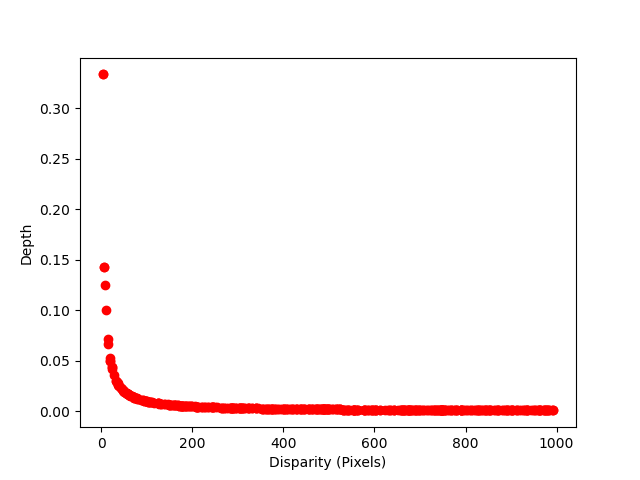

In [54]:
inversed = list(map(inverse, sample_disparity_values))
# print(inversed)

plt.xlabel('Disparity (Pixels)')
plt.ylabel('Depth')
plt.scatter(sample_disparity_values, inversed, c='r')
plt.show()


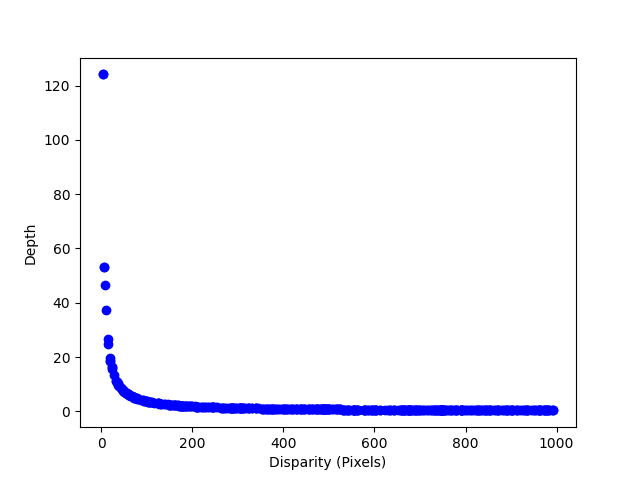

In [55]:
# Let's increase the baseline to get higher depth resolution
iphone_baseline_mm = 30
depth = list(map(toDepth, sample_disparity_values))

plt.xlabel('Disparity (Pixels)')
plt.ylabel('Depth')
plt.scatter(sample_disparity_values, depth, c='b')
plt.show()